In [6]:
from Visualization import *
from Graph import *
from GraphGenerator import *
from WarshallAlgorithm import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from prettytable import PrettyTable

list_of_n_vertices = [30,55,105,155,195]
list_of_density= [10,20,30,40,50]
AMOUNT_OF_EXPERIMENT = 40
dict_n_verticle = {}
for n_vertices in list_of_n_vertices:
    dict_n_verticle[n_vertices] = []
    for density in list_of_density:
        n = 0
        list_conduction_time = []
        while n < AMOUNT_OF_EXPERIMENT:
            graph = GraphGenerator.generate(n_vertices, density)
            reachability_matrix, conduction_time = WarshallAlgorithm.get_reachability_matrix(graph)
            list_conduction_time.append(conduction_time)
            n += 1
        dict_n_verticle[n_vertices].append((density, np.mean(list_conduction_time)))

print(dict_n_verticle)


result_table = PrettyTable(['Amount of verticles', 'Density','Average execution of algorithm'])
for n_vertices in dict_n_verticle.keys():
    list_value_given_amount_of_vericle = dict_n_verticle[n_vertices]
    for value in list_value_given_amount_of_vericle:
        density,time = value
        result_table.add_row([n_vertices, density, time])
print(result_table)

{30: [(10, 1794.825), (20, 1566.675), (30, 1479.875), (40, 1445.525), (50, 1457.625)], 55: [(10, 9555.85), (20, 8860.275), (30, 8719.875), (40, 8482.95), (50, 8386.75)], 105: [(10, 61357.0), (20, 58044.025), (30, 57425.325), (40, 56923.5), (50, 56544.025)], 155: [(10, 188896.95), (20, 183624.475), (30, 182323.4), (40, 184066.675), (50, 181977.1)], 195: [(10, 375617.525), (20, 362600.925), (30, 358262.875), (40, 352780.975), (50, 350471.65)]}
+---------------------+---------+--------------------------------+
| Amount of verticles | Density | Average execution of algorithm |
+---------------------+---------+--------------------------------+
|          30         |    10   |            1794.825            |
|          30         |    20   |            1566.675            |
|          30         |    30   |            1479.875            |
|          30         |    40   |            1445.525            |
|          30         |    50   |            1457.625            |
|          55     

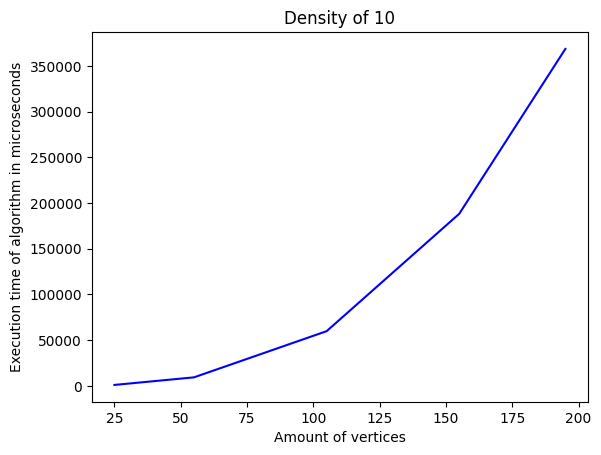

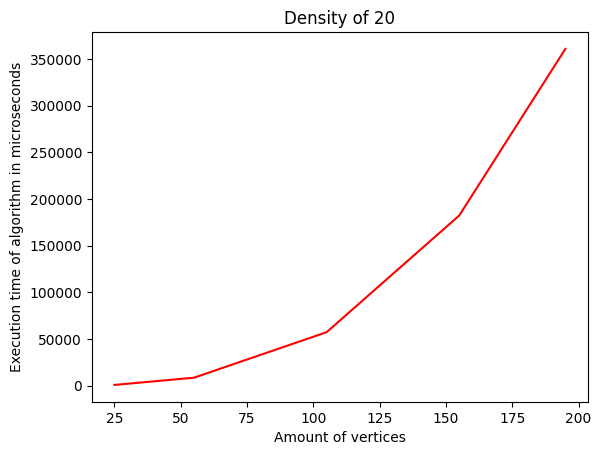

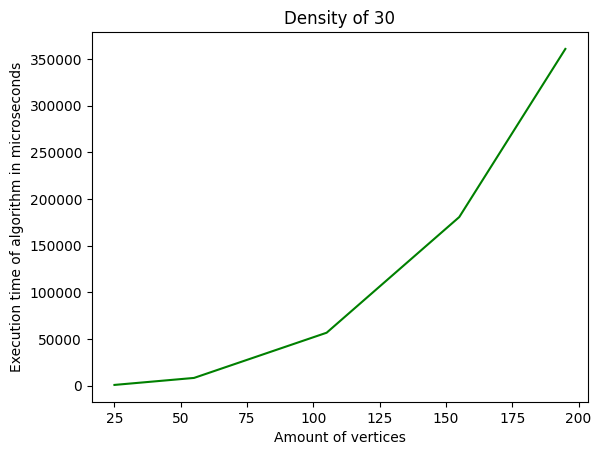

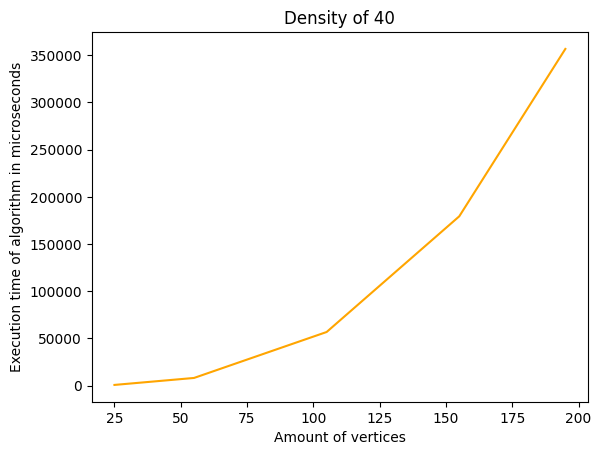

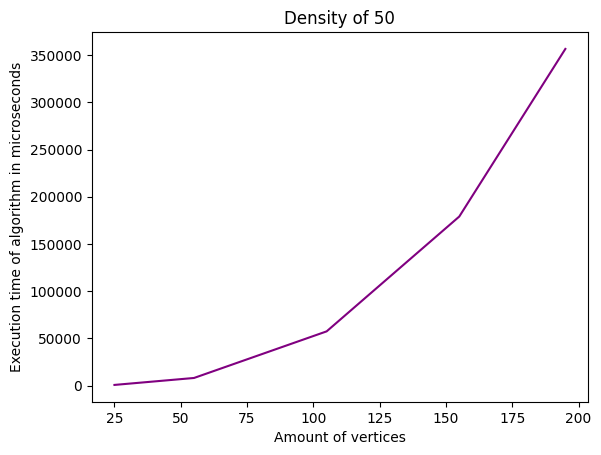

In [7]:
import matplotlib.pyplot as plt
from analyze import list_of_density , dict_n_verticle
list_for_graphs = []
colors = ['blue', 'red', 'green', 'orange', 'purple']

for n_vertices in dict_n_verticle.keys():
    list_value_given_amount_of_vericle = dict_n_verticle[n_vertices]
    for value in list_value_given_amount_of_vericle:
        density,time = value
        list_for_graphs.append([n_vertices, density, time])

dict_density = {}
for index, density in enumerate(list_of_density):
    x_list = []
    y_list = []
    for experiment in list_for_graphs:
        if experiment[1] == density:
            x_list.append(experiment[0])
            y_list.append(experiment[2])
    fig, ax = plt.subplots()
    ax.plot(x_list, y_list, color = colors[index])
    ax.set_title(f'Density of {density}')
    ax.set_xlabel('Amount of vertices')
    ax.set_ylabel('Execution time of algorithm in microseconds')